In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


 Blues=1, Classical=2, Jazz=3, Metal=4, Pop=5, Rock=6 

In [18]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

In [19]:
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,5
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,1
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,5
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,3
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,3


In [24]:
y_train = data_train["GENRE"]
X_train = data_train.drop("GENRE", axis=1)
X_train.shape, y_train.shape

((12495, 191), (12495,))

In [25]:
def k_crossvalidation(X, y, k_i, k_f, p=2):
    """
    Función para validar el mejor "K", número de vecinos para el knn.
    X_train: datos de entrenamiento
    y_train: labels de entrenamiento
    X_test: datos de prueba
    y_test: labels de prueba
    
    return: matrix, donde cada fila es el resultado de un "k" dado y la columna 1
    es el score en train y la columna dos es el score en test.
    """
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score
    n_cols = 3
    result = np.zeros((k_f-k_i + 1,2))
    idx = 0
    for i in range(k_i, k_f+1):
        knn = KNeighborsClassifier(p=p,n_jobs=3, n_neighbors=i)
        cvs = cross_val_score(knn, X, y, cv=5)
        
        result[idx,0] =  i # de k
        result[idx,1] = np.mean(cvs)
        idx+=1
            
    return result

In [26]:
score = k_crossvalidation(X_train, y_train, 2, 30, p=2)

In [28]:
print("Cross validation con los datos de train para escoger el mejor K y la mejor métrica de distancia")
print(score)

Cross validation con los datos de train para escoger el mejor K y la mejor métrica de distancia
[[ 2.          0.38167473]
 [ 3.          0.38519345]
 [ 4.          0.39695822]
 [ 5.          0.39783985]
 [ 6.          0.40176114]
 [ 7.          0.40176043]
 [ 8.          0.41056268]
 [ 9.          0.4045613 ]
 [10.          0.40536005]
 [11.          0.40488082]
 [12.          0.40527883]
 [13.          0.40295896]
 [14.          0.40232034]
 [15.          0.40408184]
 [16.          0.40024047]
 [17.          0.40135931]
 [18.          0.40136188]
 [19.          0.39696046]
 [20.          0.40072117]
 [21.          0.39951825]
 [22.          0.39768206]
 [23.          0.39775883]
 [24.          0.39799912]
 [25.          0.39743947]
 [26.          0.39943982]
 [27.          0.39527687]
 [28.          0.39447521]
 [29.          0.39415575]
 [30.          0.39575636]]


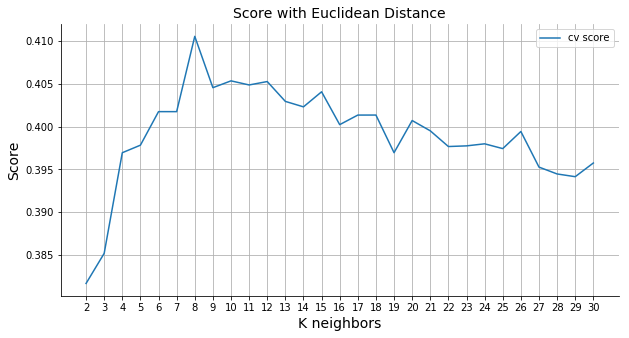

In [29]:
ax = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Score with Euclidean Distance", size=14)
plt.xlabel("K neighbors", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="cv score")
plt.grid()
plt.legend();

In [30]:
score = k_crossvalidation(X_train, y_train, 2, 30, p=1)
score

array([[ 2.        ,  0.3868779 ],
       [ 3.        ,  0.39095466],
       [ 4.        ,  0.40280001],
       [ 5.        ,  0.40736335],
       [ 6.        ,  0.40640194],
       [ 7.        ,  0.40680357],
       [ 8.        ,  0.41000133],
       [ 9.        ,  0.41208431],
       [10.        ,  0.41304559],
       [11.        ,  0.41360547],
       [12.        ,  0.41488579],
       [13.        ,  0.41336172],
       [14.        ,  0.41288191],
       [15.        ,  0.40992088],
       [16.        ,  0.41216239],
       [17.        ,  0.41360216],
       [18.        ,  0.41432338],
       [19.        ,  0.41240236],
       [20.        ,  0.41032325],
       [21.        ,  0.40872139],
       [22.        ,  0.41064155],
       [23.        ,  0.4094422 ],
       [24.        ,  0.41120364],
       [25.        ,  0.41208361],
       [26.        ,  0.40832104],
       [27.        ,  0.41072361],
       [28.        ,  0.41064264],
       [29.        ,  0.40784053],
       [30.        ,

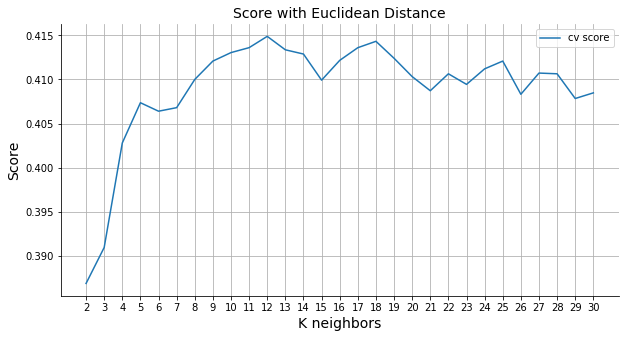

In [31]:
ax = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Score with Euclidean Distance", size=14)
plt.xlabel("K neighbors", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="cv score")
plt.grid()
plt.legend();

#### Probar con un RandomForest

In [35]:
def k_crossvalidation(X, y, k_i, k_f, p=2):
    """
    Función para validar el mejor "K", número de vecinos para el knn.
    X_train: datos de entrenamiento
    y_train: labels de entrenamiento
    X_test: datos de prueba
    y_test: labels de prueba
    
    return: matrix, donde cada fila es el resultado de un "k" dado y la columna 1
    es el score en train y la columna dos es el score en test.
    """
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import cross_val_score
    n_cols = 3
    result = np.zeros((k_f-k_i + 1,2))
    idx = 0
    for i in range(k_i, k_f+1):
        rfc = RandomForestClassifier(n_estimators=i, n_jobs=3)
        cvs = cross_val_score(rfc, X, y, cv=5)
        
        result[idx,0] =  i # de k
        result[idx,1] = np.mean(cvs)
        idx+=1
            
    return result



In [36]:
score = k_crossvalidation(X_train, y_train, 2, 30, p=1)
score

array([[ 2.        ,  0.7722248 ],
       [ 3.        ,  0.83049343],
       [ 4.        ,  0.86643099],
       [ 5.        ,  0.8716306 ],
       [ 6.        ,  0.88739788],
       [ 7.        ,  0.89347884],
       [ 8.        ,  0.89876429],
       [ 9.        ,  0.90148237],
       [10.        ,  0.90612468],
       [11.        ,  0.91013099],
       [12.        ,  0.91549057],
       [13.        ,  0.91733144],
       [14.        ,  0.91749137],
       [15.        ,  0.91925166],
       [16.        ,  0.9204532 ],
       [17.        ,  0.92085214],
       [18.        ,  0.92037067],
       [19.        ,  0.92253339],
       [20.        ,  0.92533009],
       [21.        ,  0.92445477],
       [22.        ,  0.92701439],
       [23.        ,  0.92821708],
       [24.        ,  0.92445519],
       [25.        ,  0.92725471],
       [26.        ,  0.92717384],
       [27.        ,  0.92941497],
       [28.        ,  0.92997631],
       [29.        ,  0.93197788],
       [30.        ,

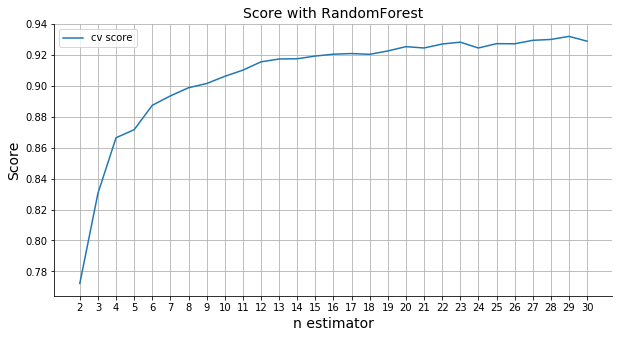

In [39]:
ax = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Score with RandomForest", size=14)
plt.xlabel("n estimator", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="cv score")
plt.grid()
plt.legend();

In [61]:
data_test = pd.read_csv("./data/genresTest.csv")
print(data_test.shape)
data_test.head()

(5225, 191)


,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


In [62]:
rfc = RandomForestClassifier(n_estimators=6, n_jobs=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfc.score(X_train, y_train)

0.990876350540216

In [66]:
predict = rfc.predict(data_test)

In [68]:
X_train.shape, data_test.shape

((12495, 191), (5225, 191))

In [72]:
data_test.index.shape, predict.shape

((5225,), (5225,))

In [75]:
predict

array([1, 2, 2, ..., 6, 1, 6])

In [93]:
result = pd.DataFrame(data=predict, index=data_test.index, columns=['Genres'])

In [81]:
result.index.name = "Id"

In [84]:
result.shape

(5225, 1)

In [82]:
result.head()

,Genres
Id,
0,1
1,2
2,2
3,6
4,2


In [83]:
result.to_csv('./results/submission_test_1.csv')

#### Normalizando los datos

In [122]:
from sklearn import preprocessing

X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(data_test)

In [123]:
rfc = RandomForestClassifier(n_estimators=8, n_jobs=3)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=3,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
rfc.score(X_train,y_train)

0.9957583033213285

In [125]:
predict = rfc.predict(X_test)

In [126]:
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_4.csv')